In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Preprocessed
!ls

In [ ]:
listOfProjati = []
ProjatiDirectory = {}
import os
path = os.getcwd()
for dir in os.listdir(path):
  if os.path.isdir(dir):
    if str(dir) != "thai banana mango (renamed)" and str(dir) != "Jubair":
      listOfProjati.append(str(dir))
      ProjatiDirectory[str(dir)] = '/' + str(dir)
ProjatiDirectory

In [ ]:
countDict = {}
for projati in listOfProjati:
  subfolderPath = path + ProjatiDirectory[projati]
  c = 0
  for file in os.listdir(subfolderPath):
    if file.endswith('.jpg') or file.endswith('.JPG') or file.endswith('.jpeg') or file.endswith('.JPEG') or file.endswith('.PNG') or file.endswith('.png'):
      # file_name, file_extension = os.path.splitext(file)
      c += 1
  countDict[projati] = c
countDict

In [ ]:
import numpy as np
img_data=np.load('image_data_pp.npy')
img_data

array([[[[0.64705884, 0.6431373 , 0.654902  ],
         [0.64705884, 0.6431373 , 0.65882355],
         [0.64705884, 0.6431373 , 0.65882355],
         ...,
         [0.7921569 , 0.8156863 , 0.80784315],
         [0.79607844, 0.8117647 , 0.80784315],
         [0.8       , 0.8117647 , 0.8117647 ]],

        [[0.6431373 , 0.6392157 , 0.64705884],
         [0.6431373 , 0.6392157 , 0.654902  ],
         [0.6431373 , 0.6392157 , 0.654902  ],
         ...,
         [0.8       , 0.8117647 , 0.80784315],
         [0.8039216 , 0.8117647 , 0.80784315],
         [0.8039216 , 0.8117647 , 0.8117647 ]],

        [[0.6431373 , 0.6392157 , 0.6509804 ],
         [0.64705884, 0.6431373 , 0.654902  ],
         [0.6431373 , 0.6392157 , 0.654902  ],
         ...,
         [0.8       , 0.8117647 , 0.8039216 ],
         [0.8039216 , 0.8156863 , 0.80784315],
         [0.8       , 0.8117647 , 0.80784315]],

        ...,

        [[0.7882353 , 0.78039217, 0.78039217],
         [0.7921569 , 0.78431374, 0.78431374]

In [ ]:
import gc
gc.collect()

32

In [ ]:
listOfProjatiCopy = listOfProjati.copy()


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(listOfProjatiCopy)
listOfProjatiCopy = le.transform(listOfProjatiCopy)
listOfProjatiCopy

array([16,  9, 11, 24,  6,  3,  5,  7,  0, 22, 19, 17, 13, 14, 25, 18,  2,
       21, 15, 23, 20, 12, 10,  4,  1,  8])

In [ ]:
target_val = []
for i in range(len(listOfProjati)):
  tempList = [listOfProjatiCopy[i]]*countDict[listOfProjati[i]]
  target_val.extend(tempList)
target_val = np.array(target_val)
target_val

array([16, 16, 16, ...,  8,  8,  8])

In [ ]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
import random
%matplotlib inline

In [ ]:
listOfProjatiCopy = listOfProjati.copy()

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(listOfProjatiCopy)
listOfProjatiCopy = le.transform(listOfProjatiCopy)
listOfProjatiCopy

array([16,  9, 11, 24,  6,  3,  5,  7,  0, 22, 19, 17, 13, 14, 25, 18,  2,
       21, 15, 23, 20, 12, 10,  4,  1,  8])

In [ ]:
target_val = []
for i in range(len(listOfProjati)):
  tempList = [listOfProjatiCopy[i]]*countDict[listOfProjati[i]]
  target_val.extend(tempList)
target_val = np.array(target_val)
target_val

array([16, 16, 16, ...,  8,  8,  8])

In [ ]:
from sklearn.model_selection import train_test_split
x, x_test, y, y_test = train_test_split(img_data,target_val,test_size=0.3, stratify=target_val)
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size = 0.2, stratify=y)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((9041, 128, 128, 3), (9041, 26))
((2261, 128, 128, 3), (2261, 26))
((4844, 128, 128, 3), (4844, 26))


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator()
val_generator = ImageDataGenerator()
test_generator = ImageDataGenerator()
train_generator.fit(x_train)
val_generator.fit(x_val)
test_generator.fit(x_test)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax,SGD
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from keras.callbacks import ReduceLROnPlateau

In [ ]:
Model = tf.keras.applications.efficientnet.EfficientNetB3(include_top= False, weights= "imagenet", input_shape= (128,128,3), pooling= 'max')

43941136/43941136 [==============================] - 0s 0us/step


In [ ]:
model = Sequential([
    Model,
    BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001),
    Dense(256, kernel_regularizer= regularizers.l2(l= 0.016), activity_regularizer= regularizers.l1(0.006),
                bias_regularizer= regularizers.l1(0.006), activation= 'relu'),
    Dropout(rate= 0.45, seed= 123),
    Dense(26, activation= 'softmax')
])

model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()

In [ ]:
batch_size= 40
epochs=20
learning_rate=.001
sgd=SGD(learning_rate,momentum=.9,nesterov=False)

In [ ]:
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
lrr= ReduceLROnPlateau(monitor='val_accuracy', factor=.01,  patience=3, min_lr=1e-5)

In [ ]:
hist = model.fit(train_generator.flow(x_train, y_train, batch_size = batch_size), epochs=epochs, steps_per_epoch = x_train.shape[0]//batch_size, validation_data = val_generator.flow(x_val, y_val, batch_size = batch_size), callbacks = [lrr], verbose = 1)

Epoch 1/20
  2/226 [..............................] - ETA: 37:58 - loss: 12.5914 - accuracy: 0.0250  

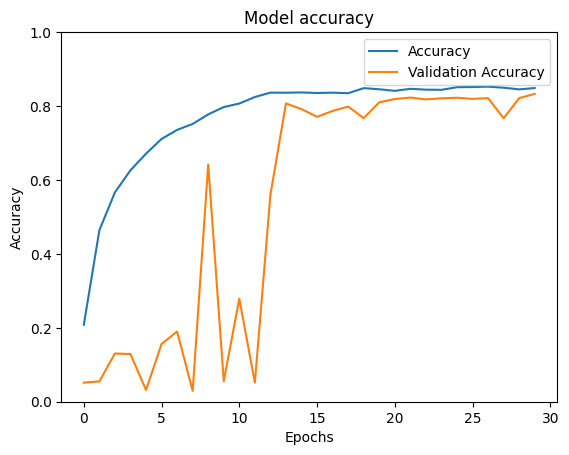

In [ ]:
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.ylim(0,1)
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

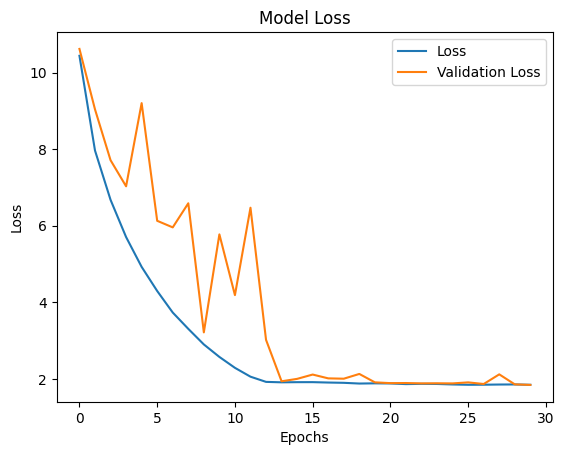

In [ ]:
plt.plot(hist.history["loss"])
plt.plot(hist.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["Loss","Validation Loss"])
plt.show()

In [ ]:
y_pred1 = model.predict(x_test)
y_true = np.argmax(y_pred1,axis=1)
y_demo = np.argmax(y_test,axis=1)

136/136 [==============================] - 5s 23ms/step


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_demo)

0.8287433464475816

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_true, y_demo, average='weighted')

0.8368234906009143

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_true,y_demo,average='weighted')

0.8287433464475816

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_true,y_demo,average='weighted')

0.8525803795556472

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_demo)
print(cm)

[[127   0   0   0   0   0   0   0   0   0   0   1   0   0   0   1   2   3
    0   0   1   2   0   0   0   3   0   0   0   0   2]
 [  0 266   8   9  10   0   0   0   0   1  11   0   1   7   9   1   1   4
    0   2   1   0   0   0   0   1   1   1   1   0   5]
 [  0   1  45   0   0   0   0   0   0  16   0   0   0   2   0   0   0   0
    0   0   1   0   0   0   0   0   0   2   0   0  14]
 [  0   5   0  14   3   0   0   0   0   0   1   0   0   0   0   0   0   0
    0   0   0   0   1   0   1   2   0   0   0   0   0]
 [  0   1   0   0   3   0   0   0   0   0   4   0   1   1   3   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   2   0   0 139   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   2   1   0]
 [  0   1   0   0   0   0 190   0   0   0   0   0   0   0   0   0   0   2
    0   4   0   2   0   7   0   0   0   0   1   0   0]
 [  0   1   0   0   0   0   0  50   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0  